# 03. PyTorch Computer Vision


**`segmentaion` read about this**

might handy for the project

## 1. Computer vision libaries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [28]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu124
0.19.0+cu124


## 1. Getting a dataset

The dataset we'll be using in FashinMNIST from torchvision.datasets


In [29]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform=ToTensor(),
                                  target_transform= None)

In [30]:
len(train_data), len(test_data)

(60000, 10000)

In [31]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [32]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [33]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [34]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [35]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [36]:
image.shape, lable

(torch.Size([1, 28, 28]), 9)

In [37]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


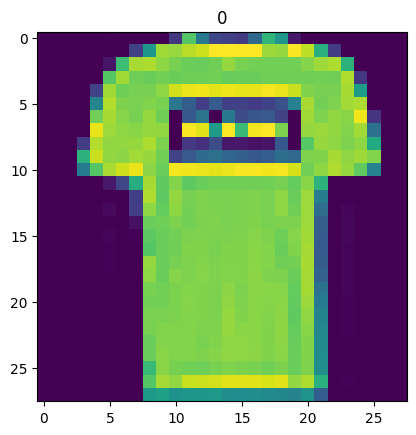

In [39]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

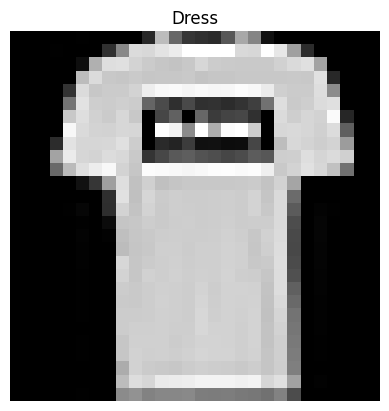

In [43]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

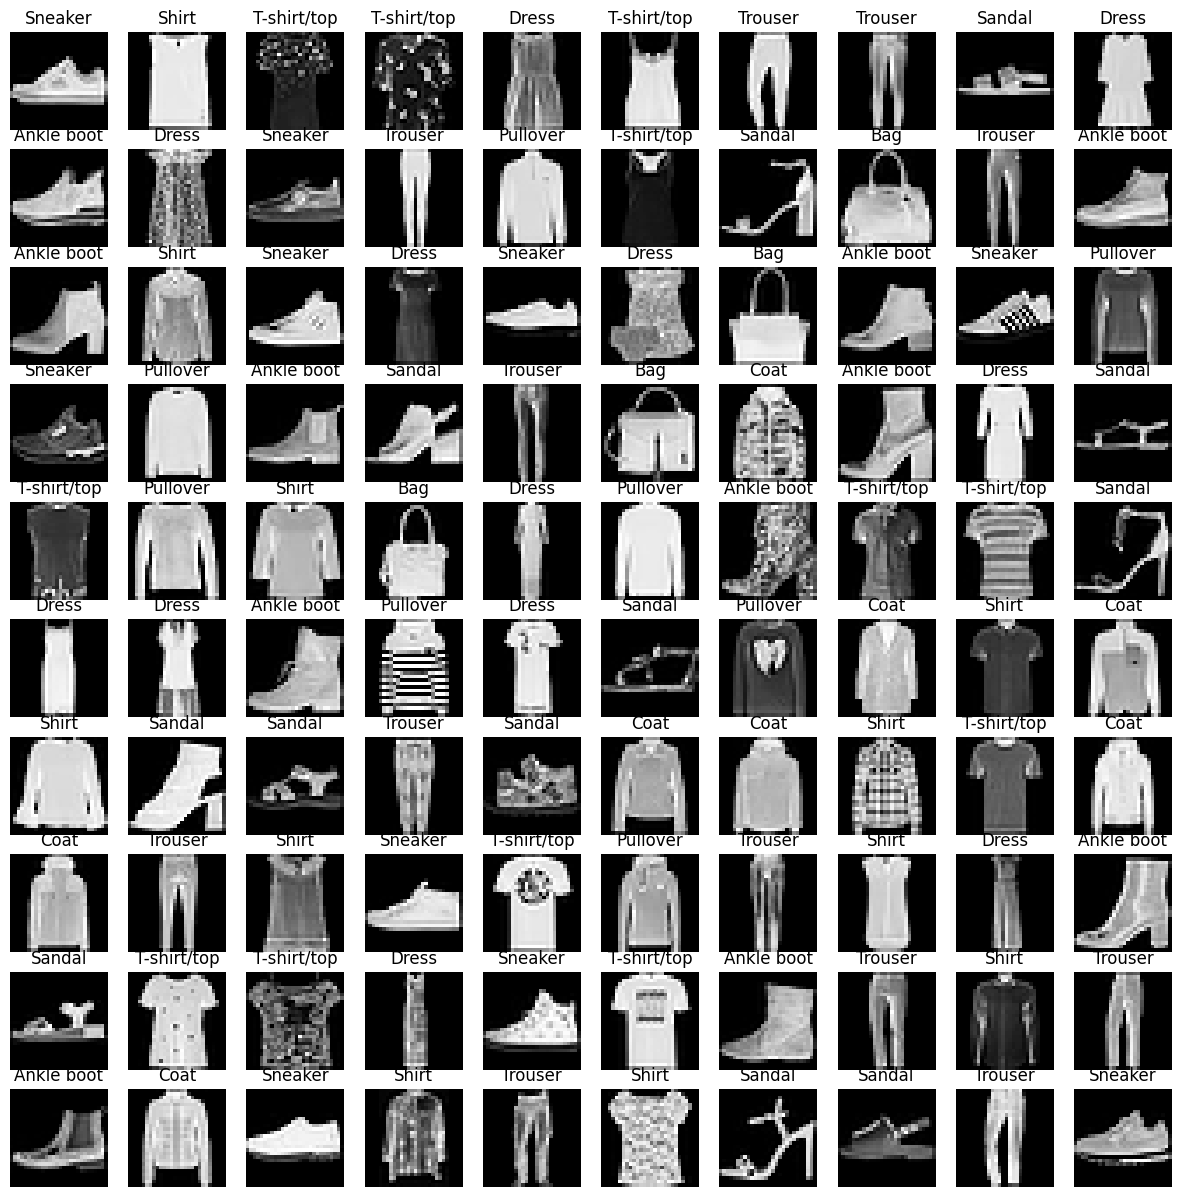

In [52]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(15,15))
rows, cols = 10, 10
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. prepare DataLoader
 Right Now, our data is in the form of pytorch

**`DataLoader turn our datasets into a pytorch iterable.`**

the point is 
**`We want to turn our data into batches (or mini-Batches).`**

the reasons!

1. it is more computationally efficient , as in , our computing hardware may not be able to look (store in memory) at 60000 images in one hit. so we breake it down to any batches like 32 , 18 or anything which help the model train in the device in bettter form

2. It gives our neural network more chance to upadte its gradients per epoch.


 

In [54]:
from torch.utils.data import DataLoader

# Setup the batch size
Batch_size = 32

# Turns datasets into iterables(Batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = Batch_size,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = Batch_size,
                             shuffle = False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x170fac34ce0>,
 <torch.utils.data.dataloader.DataLoader at 0x170fe6a5be0>)